# Psychoinformatics - Week 5 (Exercises)
by 徐舒庭 (b11705018@ntu.edu.tw)

## 進一步搜尋 Boy-Girl 版資訊 (8 points)

1. index.html 右上角 [< 上頁 ] 中包含了總頁數資訊，請用 LXML 抓出此經常變動的數字。(2 points)

In [19]:
# Plase write your codes here...
import requests
from lxml import html
from bs4 import BeautifulSoup as BS
import re

URL = 'https://www.ptt.cc/bbs/Boy-Girl/index.html'
response = requests.get(URL)

s = BS(response.text,'lxml')

item = s.find_all("a",{"class": "btn wide"})
first_page = 'https://www.ptt.cc/bbs/Boy-Girl/index.html'

for i in item:
    if i.find(text=('‹ 上頁')):
        link = i.get('href')
        first_page = 'https://www.ptt.cc' + link
        page_number = int(link.split('index')[1].split('.')[0]) + 1

print(f'總頁數: {page_number}')

總頁數: 6192


/var/folders/67/ghbhq2cn3d35t5ch2fb6wpjm0000gn/T/ipykernel_48882/1490522008.py:16: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  if i.find(text=('‹ 上頁')):


2. 請用 LXML 找出距離現在時間最近的一篇[爆]文標題與 URN (有可能需要翻頁) 。(3 points)

In [20]:
import requests
from lxml import html

url = 'https://www.ptt.cc/bbs/Boy-Girl/index.html'

while True:
    response = requests.get(url)

    tree = html.fromstring(response.content)

    posts = tree.xpath('//div[@class="r-ent"]')

    # 標記是否找到[爆]文
    found_bao = False
    found_title = "None"
    found_urn = "0"

    for post in posts:
        title_element = post.xpath('.//div[@class="title"]/a')
        if title_element:
            title = title_element[0].text
            urn = title_element[0].get('href')
            push_element = post.xpath('.//div[@class="nrec"]/span')
            if push_element:
                push = push_element[0].text
                if push == '爆':
                    found_title = title
                    found_urn = urn
                    found_bao = True

    if found_bao:
        print(f'標題: {found_title}')
        print(f'URN: https://www.ptt.cc{found_urn}')
        break

    # 獲取上頁
    prev_page_element = tree.xpath('//a[contains(text(), "‹ 上頁")]')
    if prev_page_element:
        prev_page_url = prev_page_element[0].get('href')
        url = 'https://www.ptt.cc' + prev_page_url
    else:
        print("沒有[爆]文")
        break

標題: Re: [新聞] 台南光棍節單身聯誼 男性報名不到20分鐘
URN: https://www.ptt.cc/bbs/Boy-Girl/M.1696925982.A.A35.html


3. 請用 Selenium 在 index.html 往前翻三頁，每頁拍一張照片，在notebook內顯示。(3 points)

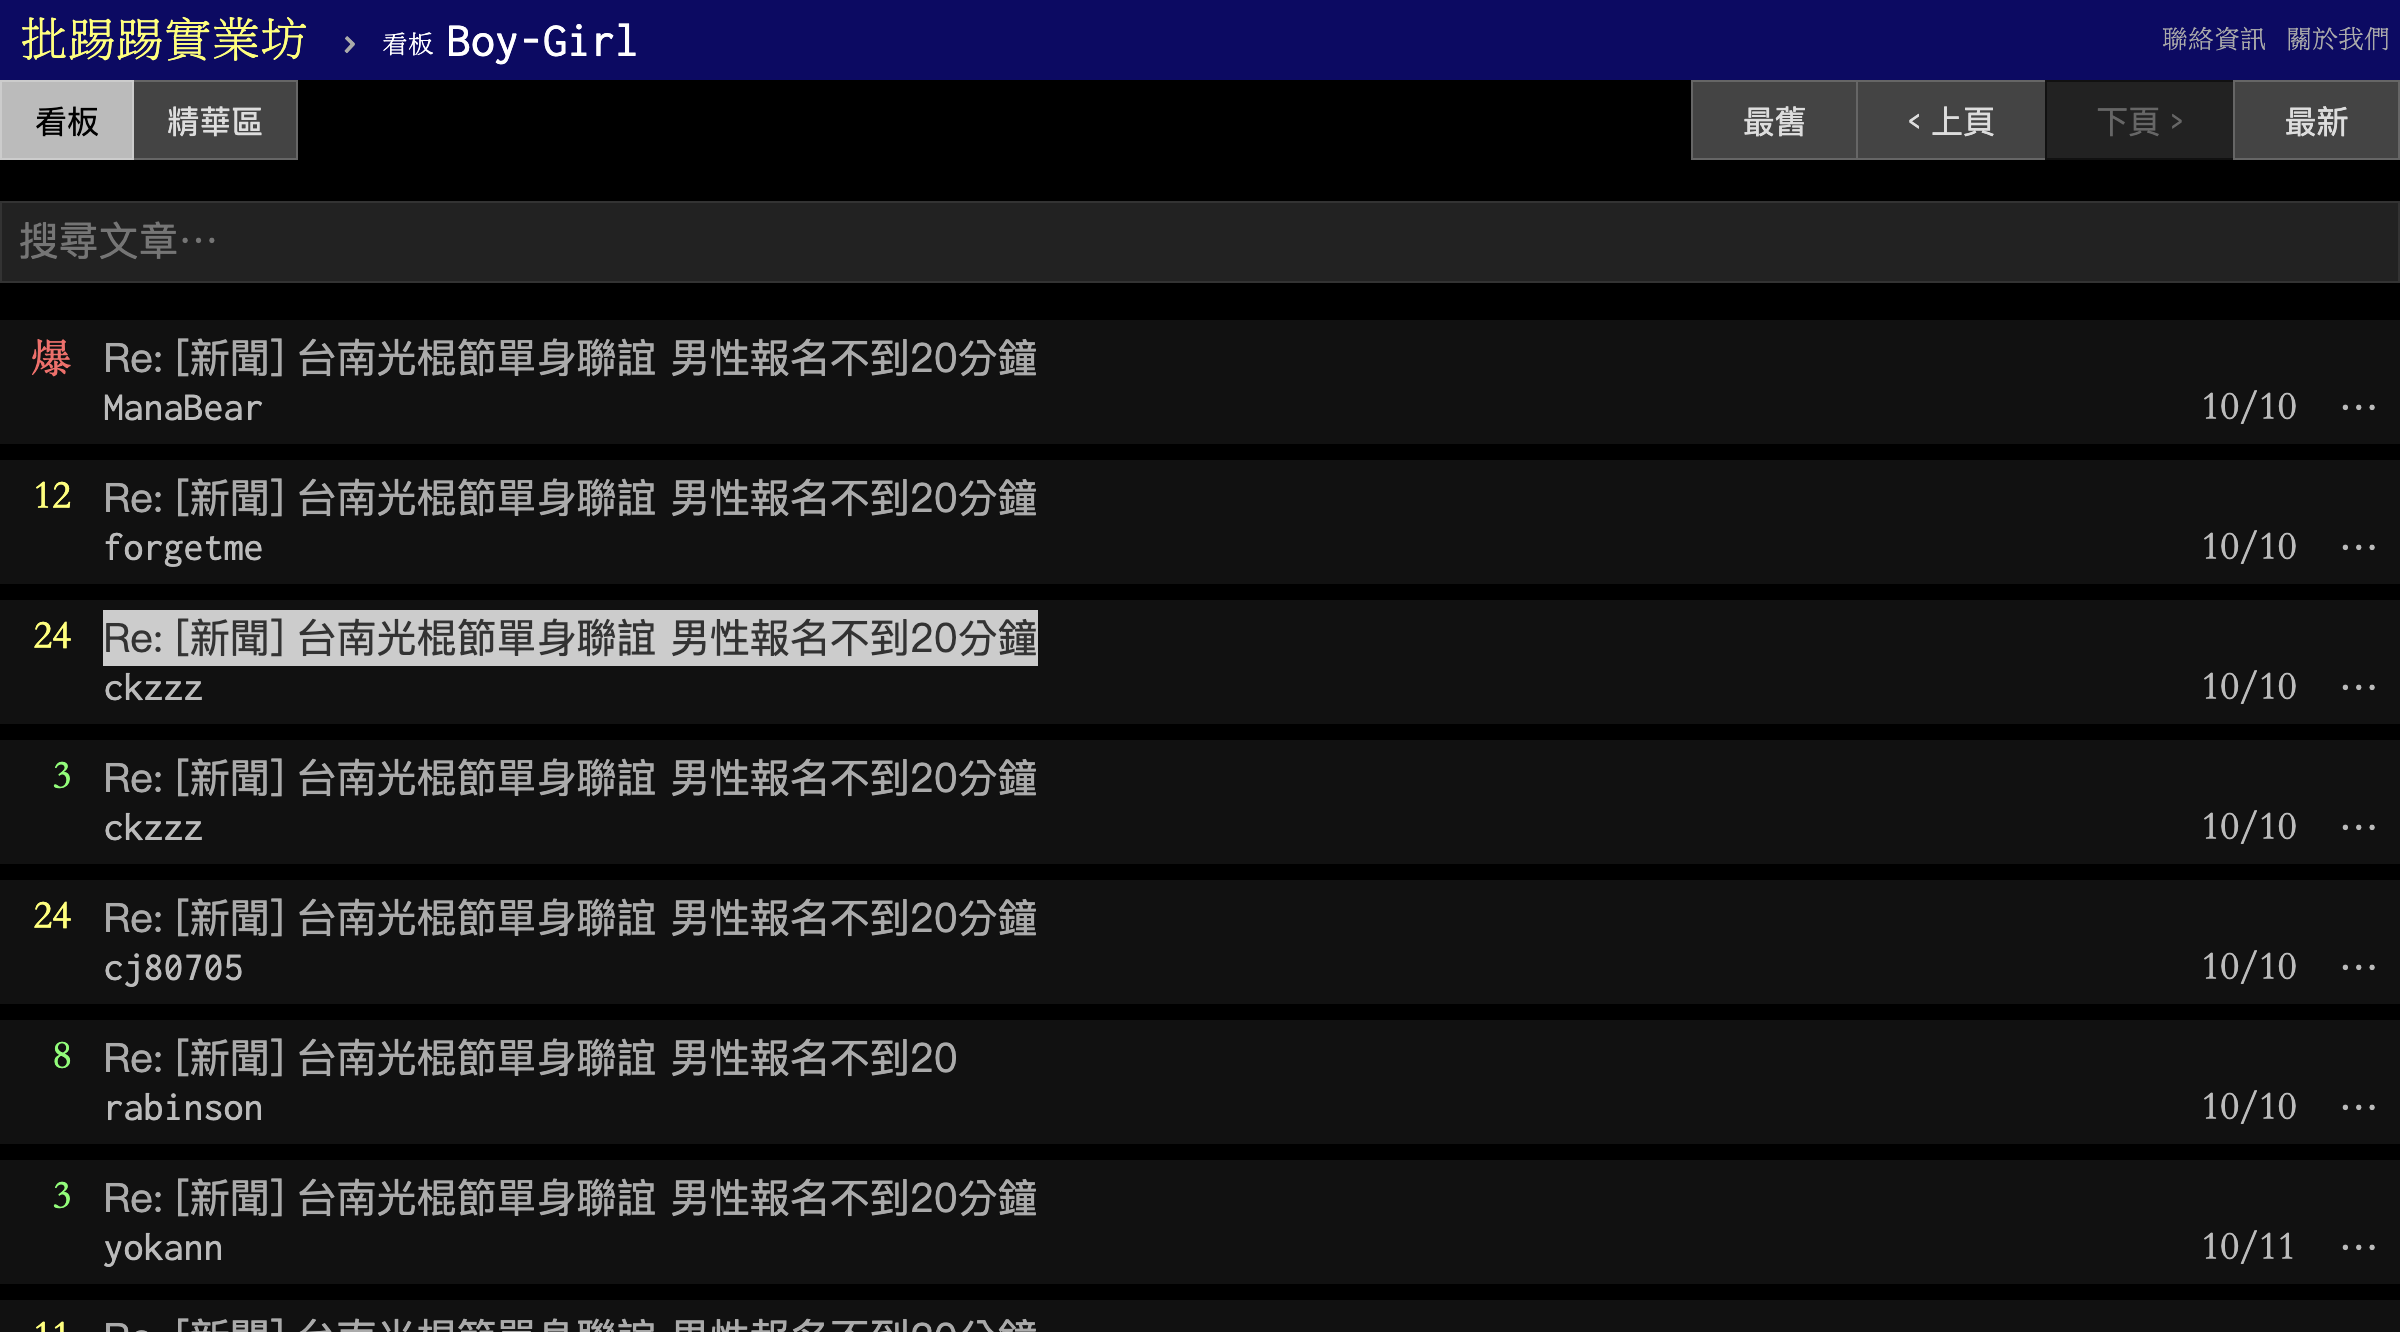

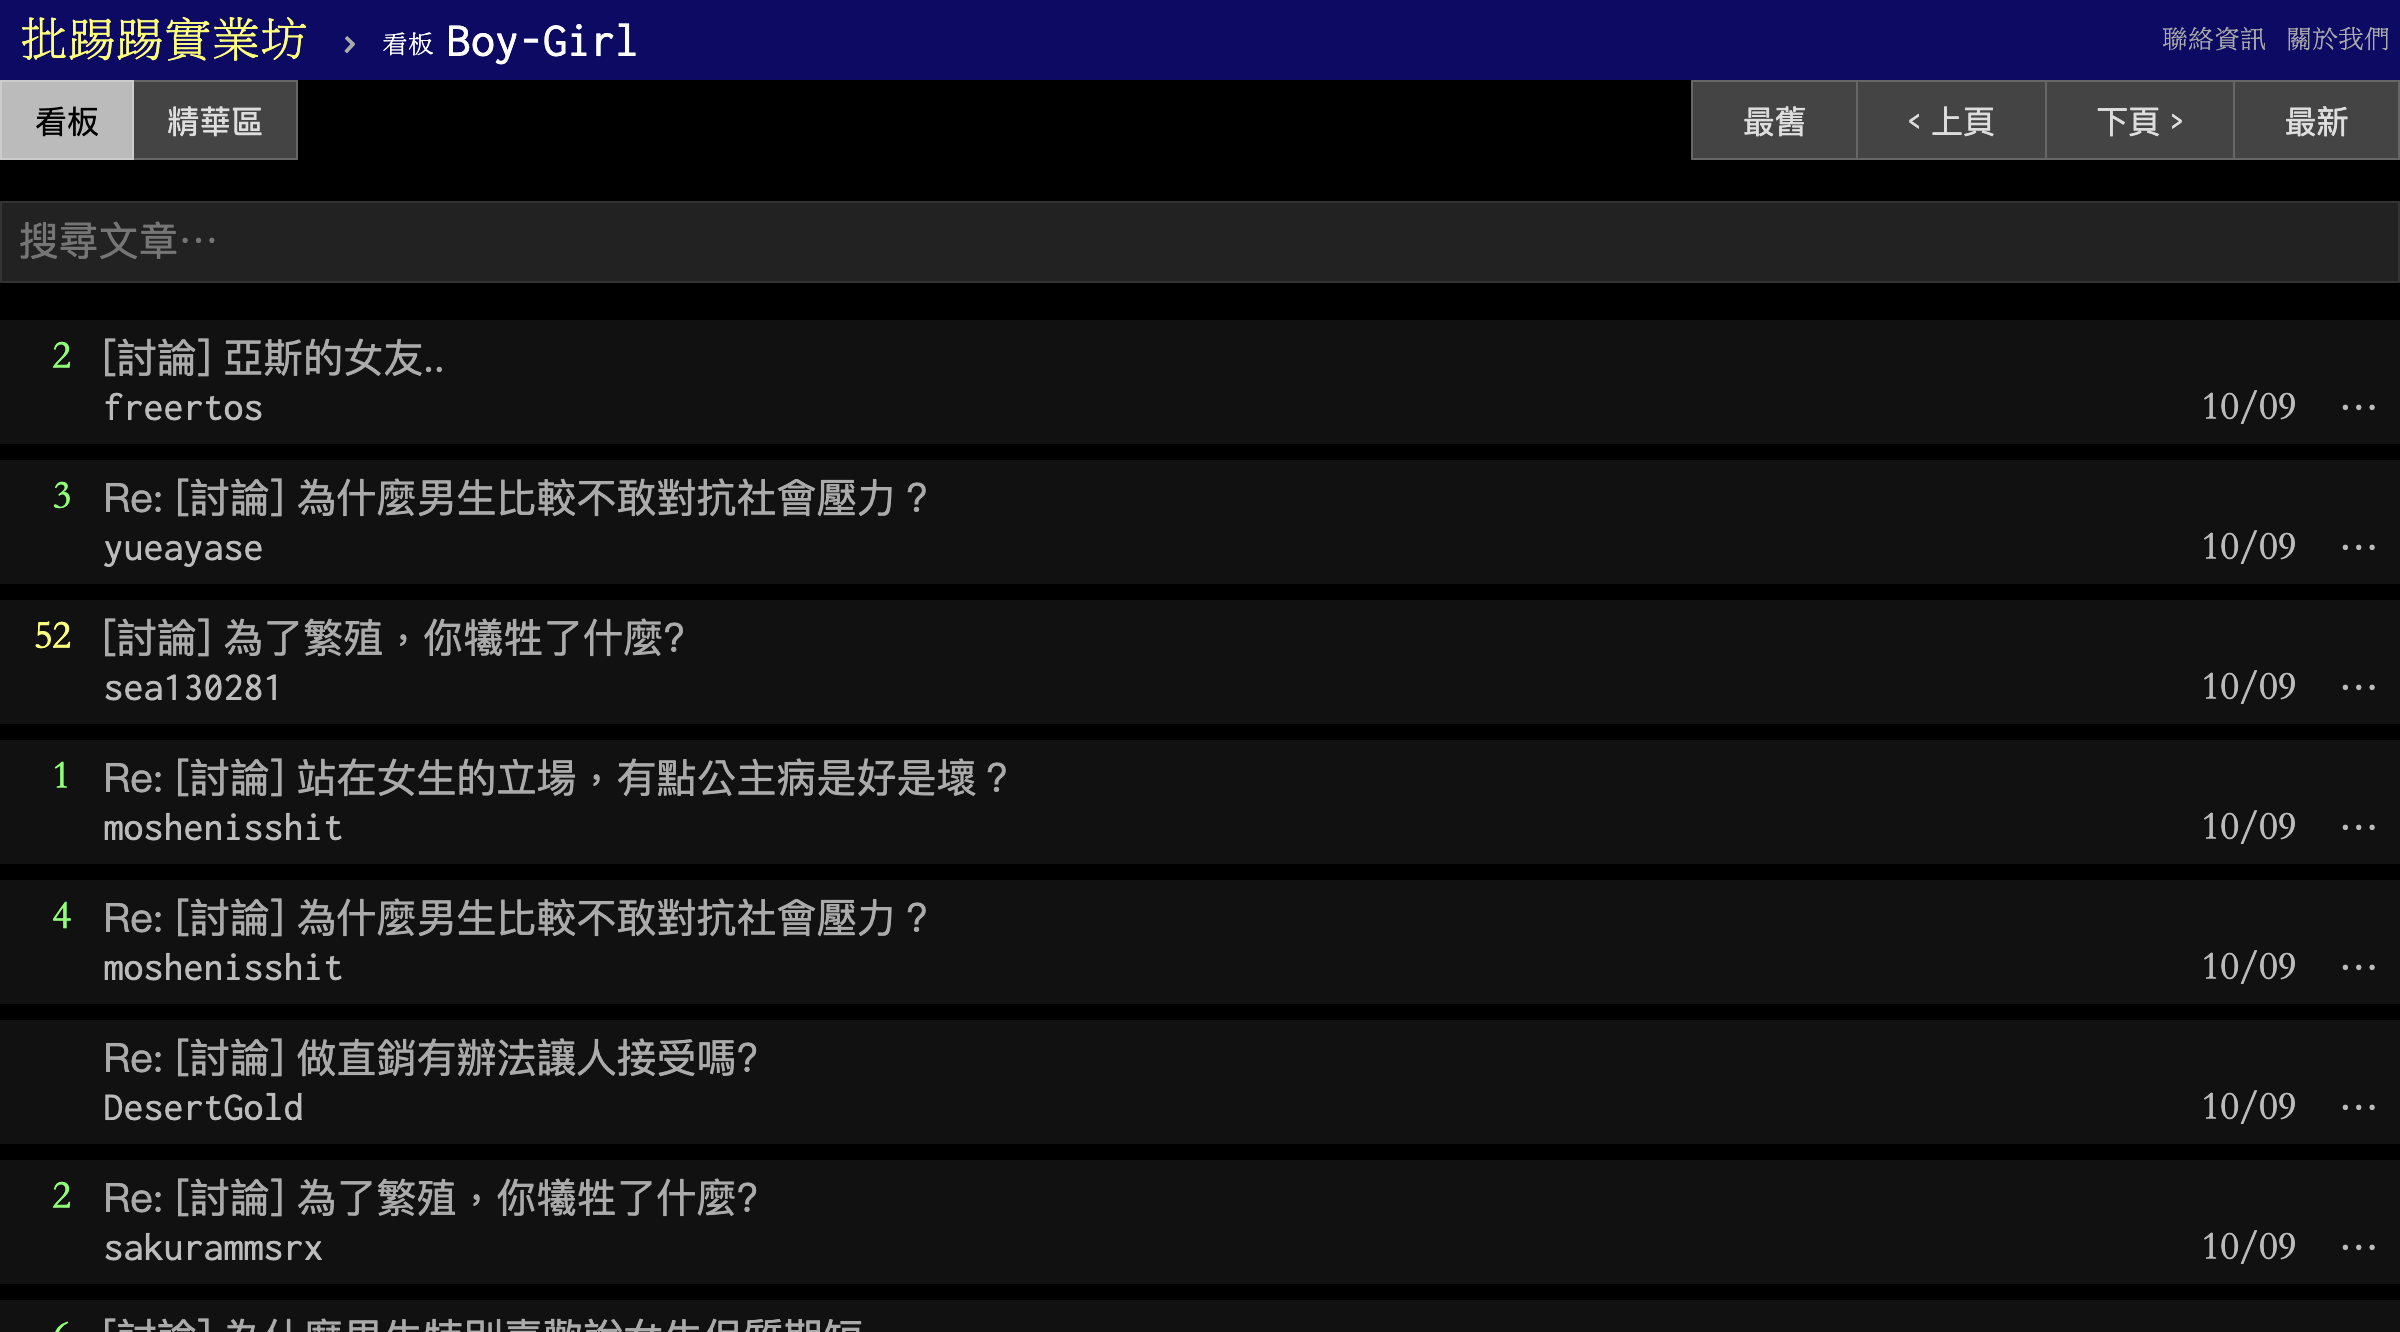

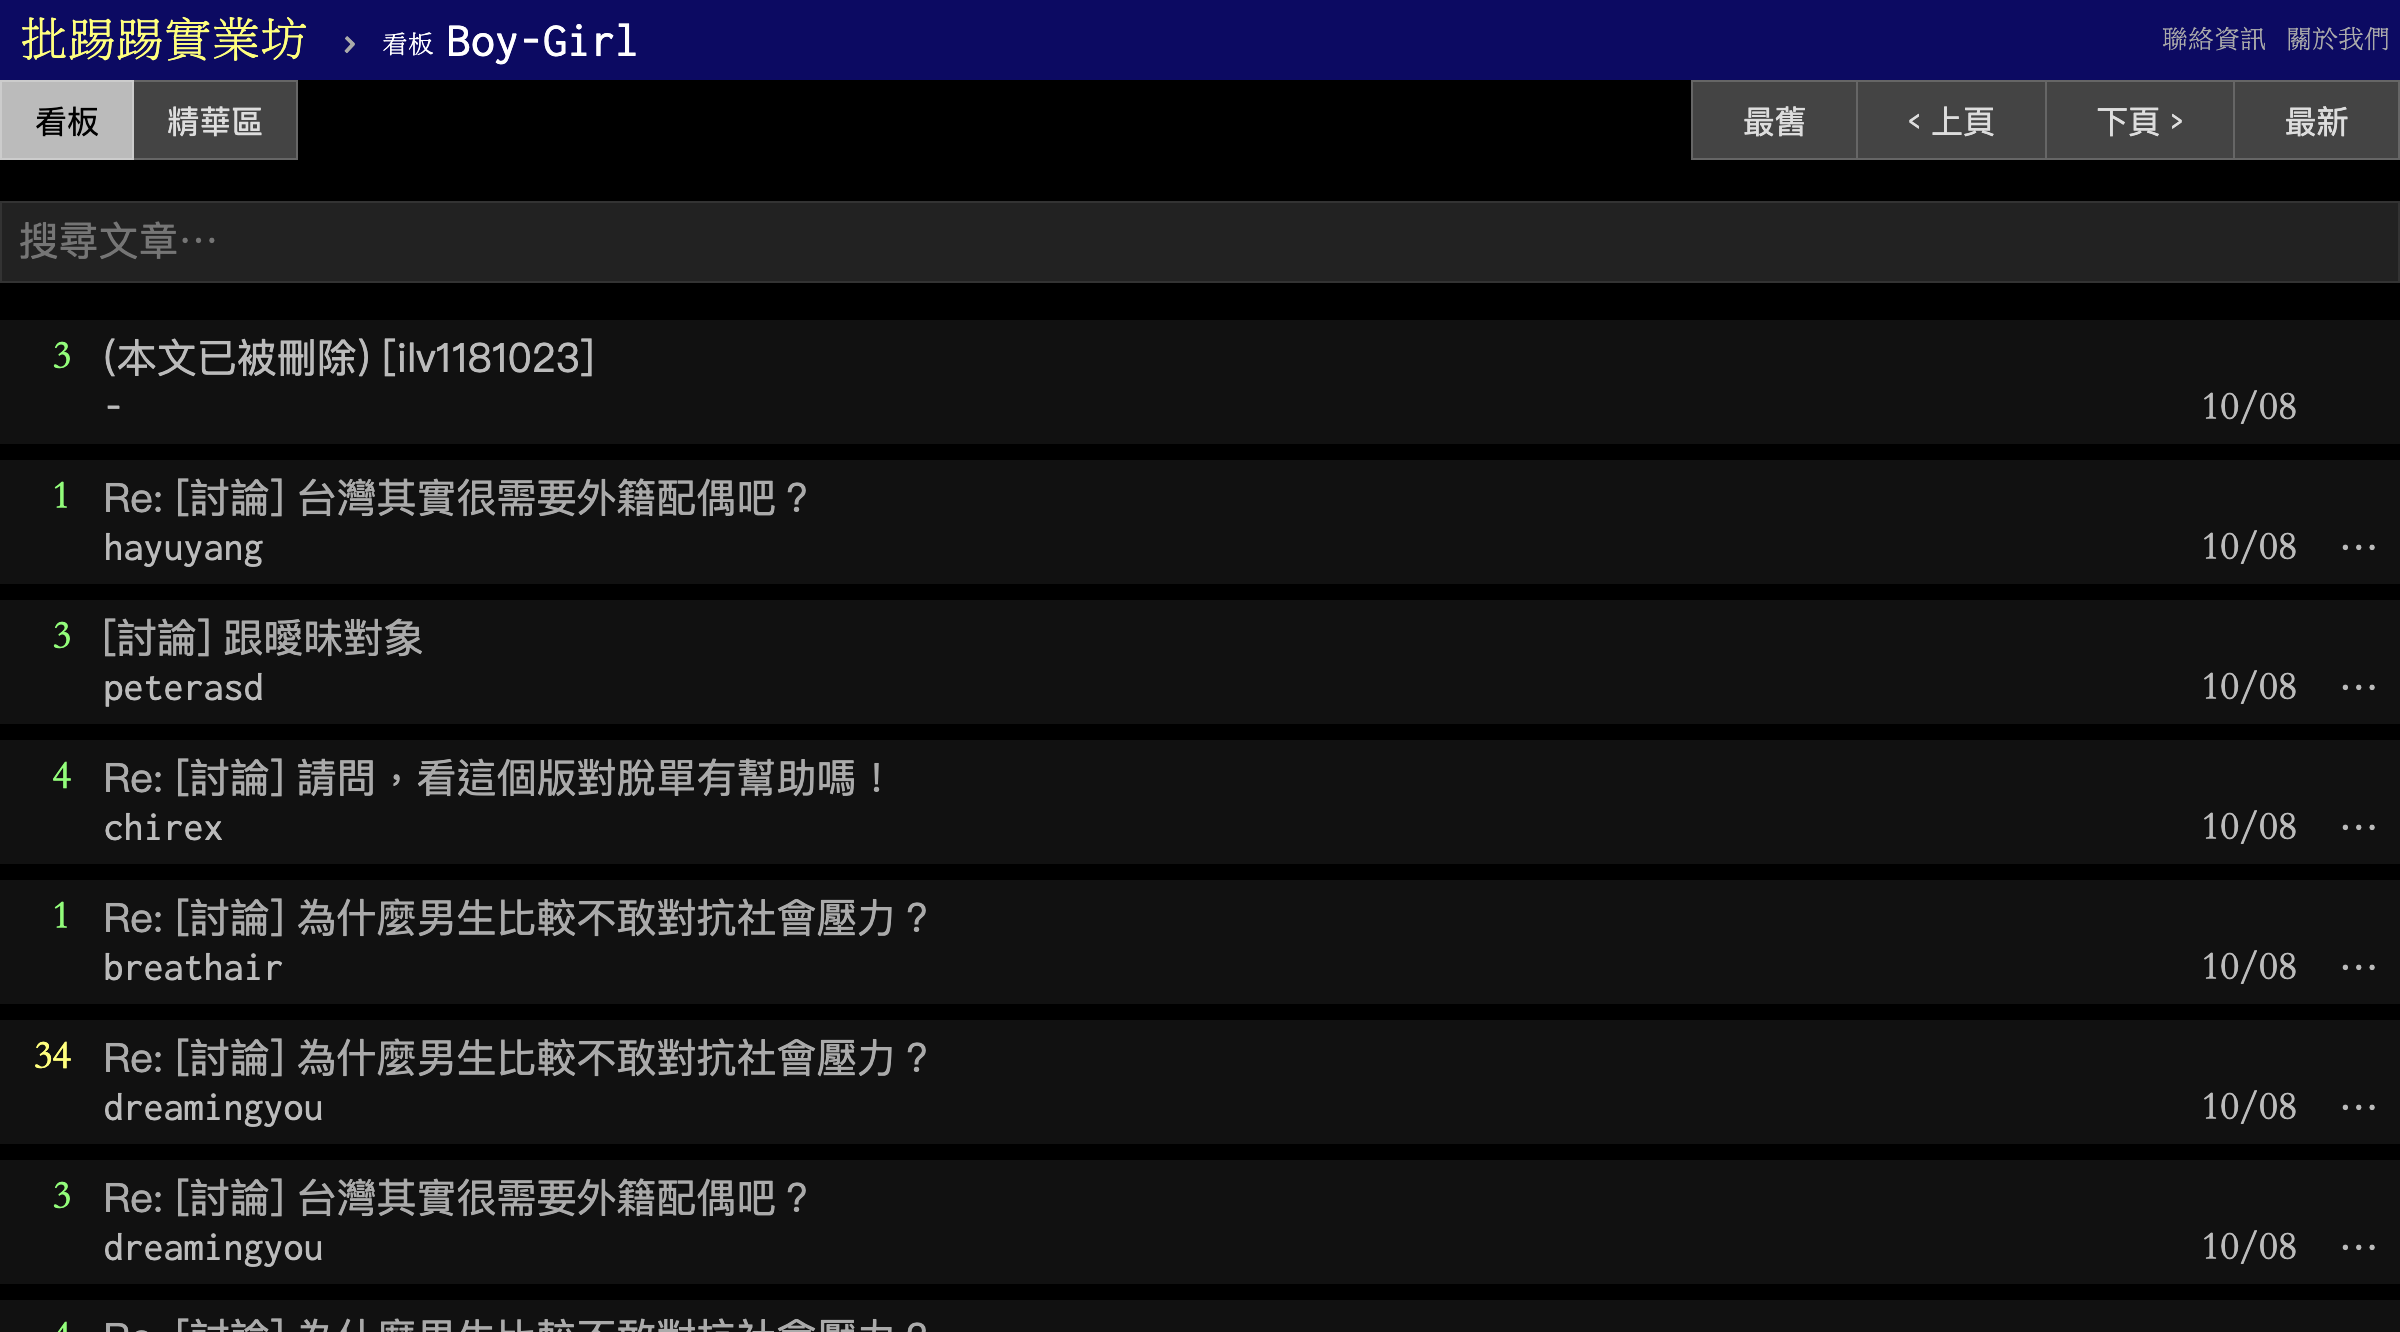

In [21]:
# Plase write your codes here...
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from IPython.display import Image, display

# 初始化Selenium WebDriver
driver = webdriver.Chrome()

# 打開PTT Boy-Girl版首頁
driver.get('https://www.ptt.cc/bbs/Boy-Girl/index.html')

# 定義函數拍攝並顯示截圖
def capture_and_display_screenshot(page_number):
    screenshot_name = f'screenshot_page{page_number}.png'
    driver.save_screenshot(screenshot_name)
    display(Image(filename=screenshot_name))

# 往前翻三頁，每頁拍攝截圖
for _ in range(3):
    capture_and_display_screenshot(_ + 1)
    time.sleep(2)
    prev_page_element = driver.find_element("link text", "‹ 上頁")
    prev_page_element.click()

# 關閉瀏覽器
driver.quit()

### Please submit your Jupyter Notebook in PDF before next Friday (10/13/2023).